In [20]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math
#%matplotlib notebook


from scipy.stats import norm, bernoulli, chi2, t
from scipy.special import comb

# Relatively Quick Standard Theory Revision

*While this revision may be quite abstract, it is to help clarify notations and sentences used in statistics, since there is standard abusing of notations and unclarity in definitions.*

A Random Variable $X$ is a *measurable funciton* from a *probablity space* $(\Omega, \cal{A}, \mathbb{P})$ into $\mathbb{R}$ with the Borel sigma algebra and the usual mesaure.   

<font color='red'>// Is it a precise description of measurability?</font>   
Measurable means at least we are able to *measure* (using $\mathbb{P}$) sets which are distinguished by intervals (i.e. having images in disjoint intervals) by $X$. For example if the space $\Omega = \{0,1\}^2$ modelling tossing a coin twice and $X$ is the value of the first toss only, then measurability of $X$ means that the sets $\{0\}\times\{0,1\}$ and $\{1\}\times\{0,1\}$ are in $\cal{A}$ (hence having a measure under $\mathbb{P}$). If, as in this, example our space in finite and out measure in uniform we need not care about this. 

We call the function $F_X:\mathbb{R}\rightarrow \mathbb{R}$ defined by  
$$F_X(x) = \mathbb{P}\left(\{\omega \in \Omega | X(\omega) \leq x\}\right)$$
the <font color='blue'>cumulative distribution function</font>, or simply the distribution. It is easy to see that $F_X$ is non-decreasing and right-continuous.   

We say that two random variables $X,Y$ have the same distribution if they have the same cumulative distribution functions, that is $F_X(x) = F_Y(x)$ for all $x\in\mathbb{R}$.  
We define the <font color='blue'>joint cumulative distributio function</font> by  
$$F_{X,Y}:\mathbb{R}^2\rightarrow \mathbb{R}$$  
$$F_{X,Y}(x,y) = \mathbb{P}\left(\{\omega\in\Omega | X(\omega)\leq x \quad \mathrm{and}\quad Y(\omega)\leq y\}\right)$$  
We say that $X$ and $Y$ are <font color='blue'>independent</font> if $F_{X,Y}(x,y)=F_X(x)F_Y(y)$. Generalization to more variables is direct.

<font color='red'>Abuse of Notation:</font> We will frop $\omega \in \Omega$, for example we will write $\mathbb{P}(X<x)$ for $\mathbb{P}(\{\omega\in\Omega | X(\omega)<x\})$. In many opportunities we will write $\Omega$ instead of $(\Omega, \cal{A},\mathbb{P})$ if the latter notation is understood implicitly or not needed.

Having the same distribution means having the same *frequencies* for images of the random variable. Two different random variables can have the same distribution, for example for an unbiased coin toss the random variables $X,Y:\{0,1\}\rightarrow\mathbb{R}$ defined by $X(x)=x$ and $Y(x)=1-x$ have the same distribution. The random variables need not have the same domain (probability space) to have the same distribution.

If $F_X$ is *absolutely continuous* over every bounded closed interval of $\mathbb{R}$ then there exists a unique <font color='blue'>probability density function</font> $f_X$, that is it satisfies  

$$F(b)-F(a) = \int_a^b f_X(x)\mathrm{dx}$$  

For a random variable $X$ we define the <font color='blue'>expectated value</font>, <font color='blue'>expectation</font> or <font color='blue'>mean</font>as  

$$\mathbb{E}[X] = \int_{\Omega}X\mathrm{d}\mathbb{P} = \int_{\mathbb{R}}xf_X(x)\mathrm{dx}$$
The second equality being whenever $X$ has a probability density function. We define the <font color='blue'>variance</font> of $X$ as  

$$\mathrm{Var}(X)=\mathbb{E}[(X-\mathbb{E}[X])^2] = \int_{\Omega}(X-\mathbb{E}[X])^2\mathrm{d}\mathbb{P} = \int_{\mathbb{R}}(x-\mathbb{E}[X])^2f_X(x)\mathrm{dx} = \mathbb{E}(X^2)-\left(\mathbb{E}(X)\right)^2$$

We call the $\mathrm{Std}(X)=\sqrt{\mathrm{Var}(X)}$ the <font color='blue'>standard deviation</font> of $X$. Standard deviation and variance measure how the image of $X(\Omega)$ is *spread* around the mean. Large standard deviation means larger probabilty of finding values away from the mean than a small standard deviation. <font color='red'>// is it?</font>
## Convergence
Let $X_1,X_2,....$ be a sequence of random variables over the same space $(\Omega,\cal{A},\mathbb{P})$. We say that $X_n$ converges almost surely to $X$, denoted $X_n \rightarrow X \quad \mathrm{a.s}$, if  
$$\mathbb{P}\left(\left\{\omega \in \Omega | \lim_{n\rightarrow\infty}X_n(\omega)=X(\omega) \right\}\right) = 1$$  

<font color='red'>Abuse of Notation:</font> In some cases, as will see in the law of large numbers, $X_i:\Omega_i\rightarrow\mathbb{R}$ don't have the same domain. In this case it is understood implicity the existence of measurable projections $p_i:\Omega\rightarrow\Omega_i$ from some $\Omega$, and that $X_i(\omega)$ means $X_i(p_i(\omega))$ for all $\omega\in\Omega$. <font color='red'>// Did not define general measurability !</font>

Let $X_1,X_2,....$ be a sequence of random variables and $F:\mathbb{R}\rightarrow\mathbb{R}$. We say that $X_i$ distributions converge to the distribution $F$ if  

$$\lim_{n\rightarrow\infty}F_{X_n}(x)=F(x)$$ for all $x\in\mathbb{R}$ <font color='red'>// at continuity points</font>. We say that $X_1,X_2,...$ converges in distribution to the random variable $X$, denotes $X_n\overset{d}{\rightarrow} X$, if $X_1,X_2,...$ distributions converge to the distribution $F_X$.

Almost surely convergence implies convergence in distribution to a random variable (remember, we are in a probability space!), but the reverse is not true.  




## Law of Large Numbers

**Theorem (Law of Large Numbers)**: Let $X_1,X_2,...:\Omega \rightarrow\mathbb{R}$ be independent and identically distributed (i.i.d.) random variables with finite and equal expectation. We have
$$\frac{X_1+X_2+...+X_n}{n} \rightarrow \mathbb{E}[X_1]\quad \mathrm{a.s}$$


Let $X:\Omega\rightarrow\mathbb{R}$. When we say that $X_1,X_2,....$ are independent copies of $X$ we mean that for every $i$ $$X_i:\prod_{k=1}^{\infty}\Omega\rightarrow \mathbb{R}$$
$$X_i((\omega_1,\omega_2,...)) = X(\omega_i)$$

A typical example is the toss of a fair coin. The probability space is $\{0,1\}$ with uniform probability measure. The random variable $X$ is simply $X(x)=x$. If we say that $0$ is for tail and $1$ for head, then the random variable

$$\bar{X_n} = \frac{X_1+X_2+...+X_n}{n}$$  
measures the frequency of heads, where $X_1,X_2,...$ are independent copies of $X$. The law of large numbers tells us that $\bar{X_n}\rightarrow 1/2$ almost surely.

The snippet below simulates this.


<IPython.core.display.Javascript object>


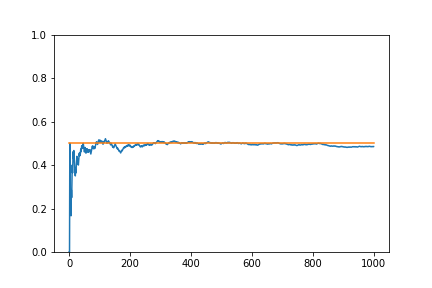

In [50]:
## tossing a fair coin 1000 times.
numberOfTosses = 1000
X_mean = [0]*(numberOfTosses+1)
X_mean[1] = random.randint(0,1)
for i in range(1, numberOfTosses):
    X_mean[i+1] = X_mean[i] + random.randint(0,1)
    X_mean[i] = X_mean[i]/i
X_mean[numberOfTosses] = X_mean[numberOfTosses] / numberOfTosses

### plotting the result
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,numberOfTosses+1), X_mean)
ax.set_ylim([0,1.0])
ax.plot([0,1000], [0.5,0.5])

We can ask *how fast* does the mean converges to the expected value or what is the ditribution of the average $\bar{X}_n$? It turns out we have a special distribution at the limit.

## Central Limit Theorem

The Normal Distribution $\cal{N}(\mu,\sigma)$ with $\sigma >0$ is defined as 
$$F(x) = \frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^x e^{-(t-\mu)^2/(2\sigma^2)}dt$$  
If $X$ is a random variable whose distribution is the normal distribution $\cal{N}(\mu,\sigma)$ then we have  

$$\mathbb{E}[X] = \mu$$  
$$\mathrm{Std}(X) = \sigma$$  


**Theorem (Central Limit Theorem)**:Let $X_1,X_2,...:\Omega \rightarrow\mathbb{R}$ be independent and identically distributed (i.i.d.) random variables with finite and equal expectation and variance. We have
$$\sqrt{n}\left(\frac{X_1+X_2+...+X_n}{n} - \mathbb{E}[X_1]\right)\bigg{/} \mathrm{Std}(X_1)\overset{d}{\rightarrow} \cal{N}(0,1)$$  
Notice that the covergence is in distribution (check convergence in distribution above).

The left hand side of the convergence in distribution above does not converge almost surely (in our case it diverges to infinity on average as quickly as $\sqrt{n}$).  
Let's test it with the fair coin toss random variable we used for law of large numbers. The mean is $1/2$ and the standard deviation is $1/2$.

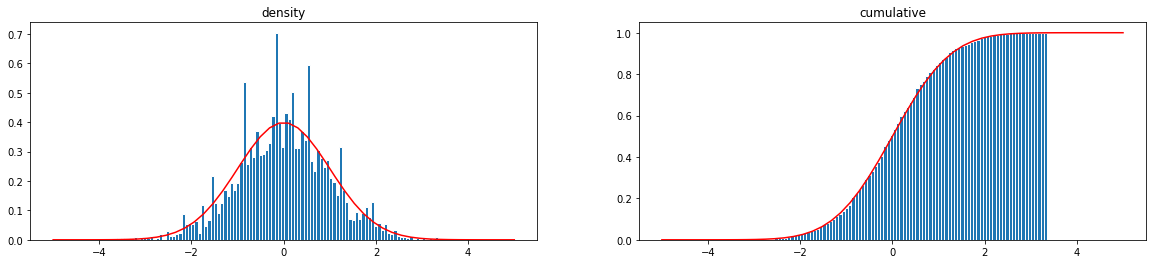

In [39]:
numberOfTrials = 3000
numberOfTossesInTrial = 1000
X_mean = np.zeros(numberOfTrials)
for i in range(0, numberOfTrials):
    for j in range(0,numberOfTossesInTrial):
        X_mean[i] = X_mean[i] + random.randint(0,1)
    X_mean[i] = X_mean[i] / numberOfTossesInTrial

### plotting the result
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
X_plot = np.sqrt(numberOfTossesInTrial)*(X_mean - 1/2)/(1/2)
ax.hist(X_plot, density=True, stacked=True, bins=100, edgecolor='white')

## plot normal distribution density function.
x_points = np.linspace(-5.0,5.0,50)
y_points = (1/np.sqrt(2*np.pi))*np.exp(-x_points**2/2)
ax.plot(x_points, y_points, color='red')
ax.set_title('density')

ax2 = fig.add_subplot(122)
ax2.hist(X_plot, cumulative=True, density=True, stacked=True, bins=100, edgecolor='white')
ax2.plot(x_points, norm.cdf(x_points), color='red')
ax2.set_title('cumulative')
plt.show()

The central limit theorem states that the distribution converges to the normal distribution as simulated on the right graph. However, one can see that the density simulated on the left is not awfully far from the density of the normal distribution, this is in fact true for a random variable with binomial distribution (defined later) as in our case. Statements about the convergence of the denisities towards the normal distribution density are call local limit theorems. One should keep in mind that the central limit theorem also holds for random variables which do not have density.  

If in addition to the conditions in the central limit theorem one has $\mathbb{E}[X_1^3]$ is finite (which is true in our example above), then Berry–Esseen theorem states that the distribution of the mean converges to the normal distribution at least as fast as $1\big/\sqrt{n}$.

### Fair Coin tests

Suppose one gave you a coin and claims it is fair. You flip the coin 100 times to get 61 heads and 39 tails, what can you say about the coin? 

For a 100 times coin flip the result (or event) $T,T,...,T$ is equally probable to any other single result including 61 heads and 39 tails. However, the number of $H$s in a 100 times flip is not uniform, that is getting only 1 $H$ is not equally probable to getting 61 $H$s. It is quite *rare* to get only 1 $H$ in a 100 times flip. One probably is ready to claim that the coin is not fair if he only gets such a rare result.  

So what we can say is whether such a result as 61 Heads and 39 tails is *rare* or not. If it is rare we convinced that the coin is not fair.  

Thus to continue we have to agree on what the word *rare* means. For us a rare event is one which is among the least $5\%$ probable events. Notice that this agreement assumes (<font color='red'>//needed?</font>) the existance of a density function for the random variables being tested to be able to compare indiviual events and hence being able to say the word *least*.  

Following this, to decide whether an event is rare we calculate the probability of having this event or less probable, if this probability is less than $5\%$ we deem the event as rare. We call this probability <font color='blue'>p-value</font>.

Let's assume the coin is fair. If we accept the central limit theorem approximation for 100 tosses, we find the p-value

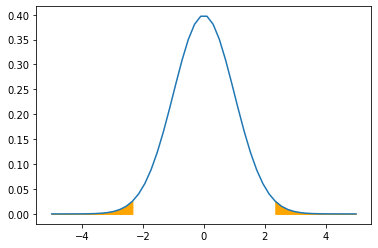

p-value = 0.02780689502699718


In [224]:
CLT_LHS = np.sqrt(100)*(61/100 - 1/2)/(1/2)# central limit theorem left hand side
#plot rarer events.
x = np.linspace(-5.0,5.0,50)
y = norm.pdf(np.linspace(-5.0,5.0,50))
plt.plot(x,y)
i = x > CLT_LHS
plt.fill_between(x[i], 0, y[i], color='orange')
plt.fill_between(-x[i], 0, y[i], color='orange')
plt.show()

p_value = 2*(1-norm.cdf(CLT_LHS))
print(f'p-value = {p_value}')

We found that it is only among the least $2.8\%$ events, hence we deem the coin unfair. Above in the normal distribution we shaded the area representing the probability $2.8\%$ of the least probable events.  

Without the central limit theorem we can simulate 100 tosses of a fair coin and approximate the probability of having the 61 heads or more less probable events. Below we found that getting between 61 heads does not seem to exceed around $3\%$, which is rare.

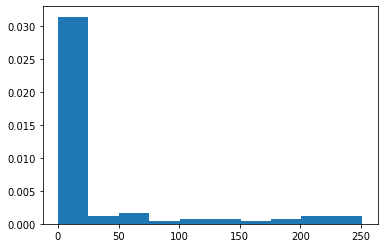

p-value = 0.029666666666666668


In [254]:
numberOfTossesInTrial = 100
numberOfTrials = 3000

result_count = np.zeros(numberOfTossesInTrial)
for i in range(0, numberOfTrials):
    result = 0
    for j in range(0,numberOfTossesInTrial):
        result = result + random.randint(0,1)
    result_count[result] += 1

plt.hist(result_count, density=True)
plt.show()

# The probability we get 58 to 62 heads.
p_value = np.sum(result_count[result_count <= result_count[61]])/numberOfTrials
print(f'p-value = {p_value}')

Since we know the distribution and it is simple we can go and calculate the probability of getting $m$ heads wich is  
$$\binom{100}{m}2^{-100}$$  
Therefore the probability of having 61 heads or rarer events (p-value) is
$$\sum_{m=61}^{100}\binom{100}{m}2^{-100} + \sum_{m=0}^{39}\binom{100}{m}2^{-100}$$  
which is $3.5\%$ as below which is indeed rare.

In [253]:
result = 0
for i in range(61, 101):
    result += comb(100,i)

# because the two sums are equal
result = 2*result

result = result * 2**-100
print(f'p-value = {result}')

p-value = 0.0352002002177048


<font color='red'>Caution:</font> We calculated and approximated the p-value above, but all of this is build of the assumption that the coin is fair. p-value of an event is the probabily of getting this event or less probable events *given a probability distribution*. What we did is that we rejected the normal distribution of the means of the tosses because the result we got was rare in such a distribution. Rejecting this distribution means rejecting the uniform distribution of the results of the coins (i.e. a fair coin).

Let's have another example. Say you tossed a coin 150 times. You counted and found the coin prefectly landed 50 times on head and 50 times on tail ! But you noticed you never got 4 consecutive heads nor tails in a row, can we say something about the coin? As in the mean case above while every indivisual event is equally probable the length of the longest consecutive $H$ or $T$ chain is not uniform.

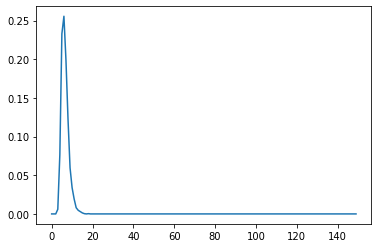

p-value = 0.015666666666666666


In [255]:
numberOfTosses = 150
numberOfTrials = 3000
countOfConsecutiveHs = np.zeros(numberOfTosses)
countOfConsecutiveTs = np.zeros(numberOfTosses)

for i in range(0, numberOfTrials):
    currentHChainLength = 0
    maxHChainLength = 0
    currentTChainLength = 0
    maxTChainLength = 0
    for j in range(0,numberOfTosses):
        toss = random.randint(0,1)
        if toss == 1: # i.e. head
            currentTChainLength = 0
            currentHChainLength += 1
            if maxHChainLength < currentHChainLength:
                maxHChainLength = currentHChainLength
        else: # tail
            currentHChainLength = 0
            currentTChainLength += 1
            if maxTChainLength < currentTChainLength:
                maxTChainLength = currentTChainLength

    countOfConsecutiveHs[maxHChainLength] += 1
    countOfConsecutiveTs[maxTChainLength] += 1

maxChainLength = np.maximum(countOfConsecutiveHs, countOfConsecutiveTs)
plt.plot(range(0,numberOfTosses), maxChainLength/numberOfTrials)
plt.show()

# calculate the p-value (assuming fairness of the coin of course)
p_value = np.sum(maxChainLength[maxChainLength <= maxChainLength[3]])/numberOfTrials
print(f'p-value = {p_value}')

There is less than $2\%$ of not having 4 consecutive $H$s or $T$s or rarer events which is rare according to our definition. Hence we reject the hypothesis that is the coin is fair.

### Hypothesis Testing Notions

To avoid confusion and follow standard namings from now on we are going to use the word <font color='blue'>unlikely</font> for what we previously named rare events.
What we did above is hypothesis testing. We can write what we did (with additional standard formalism) as follows.  
Let $X:\Omega\rightarrow \mathbb{R}$. We call $\Omega$ the <font color='blue'>population</font> and $(\omega_1,\omega_2,...,\omega_n)\in\Omega^n$ a <font color='blue'>sample</font> for any finite sequence of elements of $\Omega$. In our examples of the fairness of a coin for $n$ tosses $\Omega$ was $\{0,1\}^n$. and the sample was the 61 heads and 39 tails in the first example and in the second was one without 4 consecutive heads or tails. The test starts by *assuming a hypothesis* which we call the <font color='blue'>null hypothesis</font> and we call its negation the <font color='blue'>alternative hypothesis</font>. The null hypothesis was that the coin is fair in the example above. We also have a continuous (<font color='red'>//needed?</font>) function $s:\mathbb{R}^n\rightarrow\mathbb{R}$ called the <font color='blue'>statistic</font>. In the first example the statistic was the *sample mean* while in the second was the length of the longest consecutive chain of $H$s or $T$s. We consider the distribution of the random variable $s(X_1,X_2,....,X_n):\Omega^n\rightarrow\mathbb{R}$ where $X_1,...,X_n$ are independent copies of $X$ (remember the abusement of notation we mentioned previously, each $X_i$ alone can be seen as a function on $\Omega$). If the value of the static our sample is unlikely given the distribution that follows from assuming the null hypothesis that is its <font color='blue'>p-value</font> is less than $5\%$, we reject the null hypothesis. This rejection means either the null hypothesis is false or it is actually true but one got an extremely unlikely (or maybe very lucky) result.  
There is still something missing, right? We defined the statistic for independet variables, while we said nothing about how we can say that the sample is independent or even defined it. It may suffice to define the <font color='blue'>methodology of sampling</font> (choosing a sample) as a sequence of measurable functions $\left(f_n:\cal{S}_n\rightarrow \Omega^n\right)_{n\geq1}$, each from measure space $\cal{S_n}$ with measures $\cal{P}_n$ into $\Omega^n$ whose measure we denote $\mathbb{P}^n$, such that the push forward $f_n\#\cal{P}_n\rightarrow\mathbb{P}^n$ in some sense such as weak convergence of their difference considered as elements of the dual space of bounded continuous functions to $0$.  

This definition of methodology may be abstract and maybe restrictive, but the idea is that we may not have access to $\Omega$ but we have access to some $\cal{S_n}$. For example in several cases $\cal{S_n}$ is $\{1,...,n\}$ with uniform distribution, choosing $f_n$ is what is important in this case.

<font color='red'>Digression:</font> Although it may be clear but informally for the sake of clarity when discussing and stating theorems about hypothesis testing we always state "Let $X_1,..,X_n$ be i.i.d" while the image of the sample we have is just $(X_1(\omega),...,X_n(\omega))$ for some $\omega\in\Omega^n$, but we mean that no matter what $\omega$ is the sample the result is almost always true.

The $5\%$ we agreed upon is called the <font color='blue'>level of significance</font> and denoted usually by $\alpha$. If $F$ is the distribution we are testing, the points $a,b$ for which $F(a) = \alpha/2$ and $F(b)=1-\alpha/2$ are called <font color='blue'>critical values</font>. These points are defined this way for distributions which increases till a point then decreases (which is the common thing). The regions $\{(x,F(x)) | x \leq a \quad \mathrm{or}\quad x \geq b\}$ is called the <font color='blue'>critical region</font>.  
In the first example of the fairness of the coin, we rejected that the coin is unfair. Let's ask when the coin is fair what is the *accepted* number of heads in $100$ tosses. By accepted here we just mean -as we did with rare- among the $95\%$ (or $1-\alpha$) most probable events. We accepted that  
$$\frac{\sqrt{100}(\textrm{average number of Hs } - 1/2)}{1/2}$$  
follows standard normal distribution (i.e. with mean $0$ and variance $1$). Following the definitions just above, level of significance $\alpha=0.05$, the critical values for this $\alpha$ and the standard normal distribution are $\pm1.96$ (calculated numerically). To be among the most $95\%$ most probable events we have to be between these two critical values. Therefore we are $95\%$ *confident* that we have
$$-1.96 <\frac{\sqrt{100}(\textrm{average number of Hs } - 1/2)}{1/2} < 1.96$$  
which is equivalent to $\textrm{average number of Hs } \in (0.402,0.598)$. Out coin in the first example had $0.61$ as the average number of $H$s which is indeed out of the interval specified. such interval is called <font color='blue'>confidence interval</font>.  

We say that we made an error of <font color='blue'>Type I</font> if the we rejected a true null hypothesis and <font color='blue'>Type II</font> if we did not reject a false null hypothesis.

Given a sample size $n$ and a hypothesis $H_1$ we define the <font color='blue'>power</font> of the test as the probability of rejecting the null hypothesis under the assumption of the hypothesis $H_1$ (in many places it is found written as $\mathbb{P}(\textrm{reject } H_0|H_1 \textrm{ is true})$ but we shall avoid such unclear notations at the moment). $H_1$ is not necessarily the alternative hypothesis, but one can see that tying to keep the power high is related to trying to avoid type I error. Let's look at the coin example again. In the example we rejected the null hypothesis. Let's suppose the hypothsis $H_1$ that states the probability of $H$ (head) is $\theta$. Then the central limit theorem states
$$\frac{\sqrt{n}(\textrm{average number of Hs } - \theta)}{\sqrt{\theta(1-\theta)}}$$  
rejecting the null hypothesis means  
$$\left|\frac{\sqrt{n}(\textrm{average number of Hs } - 1/2)}{1/2}\right| \geq 1.96$$
We want to calculate this probability under the $H_1$ hypothesis. We have  

$$\begin{align}
&\quad\mathbb{P}\left(\left|\frac{\sqrt{n}(\textrm{average number of Hs } - 1/2)}{1/2}\right| \geq 1.96\right)\\
= &\quad \mathbb{P}\left(\textrm{average number of Hs } \geq \frac{0.98}{\sqrt{n}} + 0.5\right) + \mathbb{P}\left(\textrm{average number of Hs } \leq \frac{-0.98}{\sqrt{n}} + 0.5\right)\\
= & \quad\mathbb{P}\left(\frac{\sqrt{n}(\textrm{average number of Hs } - \theta)}{\sqrt{\theta(1-\theta)}} \geq \frac{0.98 + (0.5-\theta)\sqrt{n}}{\sqrt{\theta(1-\theta)}}\right)\\
+ & \quad\mathbb{P}\left(\frac{\sqrt{n}(\textrm{average number of Hs } - \theta)}{\sqrt{\theta(1-\theta)}} \leq \frac{-0.98 + (0.5-\theta)\sqrt{n}}{\sqrt{\theta(1-\theta)}}\right)\\
= & \quad  1-F\left(\frac{0.98 + (0.5-\theta)\sqrt{n}}{\sqrt{\theta(1-\theta)}}\right) + F\left(\frac{-0.98 +(0.5-\theta)\sqrt{n}}{\sqrt{\theta(1-\theta)}}\right)\\
= & \quad F\left(\frac{-0.98 -(0.5-\theta)\sqrt{n}}{\sqrt{\theta(1-\theta)}}\right) + F\left(\frac{-0.98 +(0.5-\theta)\sqrt{n}}{\sqrt{\theta(1-\theta)}}\right)\\
\geq & \quad F\left(\frac{-0.98 +|0.5-\theta|\sqrt{n}}{\sqrt{\theta(1-\theta)}}\right)
\end{align}$$  

Where F is the normal distribution, we also used the identity $F(x)+F(-x)=1$. If we want our test power to be at least $80\%$ ($F(0.84)\approx 0.8$), then we want  

$$\frac{-0.98 +|0.5-\theta|\sqrt{n}}{\sqrt{\theta(1-\theta)}} > 0.84\Rightarrow n > \frac{((0.84)\sqrt{\theta(1-\theta)}+0.98)^2}{(0.5-\theta)^2} \geq \frac{(0.98)^2}{(0.5-\theta)^2}$$  
When the hypothsis $H_1$ suppose a $\theta$ that is not very close to $1/2$ our test has high power for small sample, that is it happened that $H_1$ is true instead of the null hypothesis then we have good probability of rejecting the null hypothesis. However when $\theta$ is close to $1/2$ we will need larger $n$ as it is clear from the inequality above. In our example where $n=100$ we have using the inequality above (the weaker one because it is simpler :))  
$$|0.5 - \theta| > \frac{0.98}{\sqrt{n}} = 0.098$$  
That is our test we did with $100$ tosses have good probability (at least $80\%$) of rejecting the null hypothesis if the true number of $H$s was at least $0.098$ away from $1/2$. In the first example, the difference was $0.11$ which is larger.

One shall keep in mind that events such as winning a lottery while has an exteremly small probability is not unlikely by our definition of unlikely (not among the least $5\%$ probable events), because everyone has the same probability of winning. <font color='red'>// What do you think, reader?</font>

### Sum of Independent Random Variables
*Back to little theory.*  

We already used sums but here we will consider sum with density only. Sums distributions are essential, we are summing and averaging a lot as we saw (be careful, diftribution of sum is not the same as average).

Let $X_1,X_2$ be two independent random variables with continuous densities $f_X,f_Y$ and distributions $F_X,F_Y$ respectivily. Notice that the continuity and non-negativity of $f_X$ and $f_Y$ make their Lebesgue and Riemann integral equal and we can say that $F'(s)=f(s)$. 
Let $s\in\mathbb{R}$. We want to calculate  
$$\mathbb{P}\left(X + Y \leq s\right)$$  
Let $a<b$ and $a=a_1<a_2<...<a_n=b$ be real numbers. We have
$$\begin{split}
\mathbb{P}(a\leq X< b \quad \mathrm{ and }\quad X+Y\leq s) & \leq \sum_{i=1}^{n-1}\mathbb{P}(a_i\leq X < a_{i+1} \quad \mathrm{ and }\quad  Y \leq s-a_i) \\
 & = \sum_{i=1}^{n-1}\mathbb{P}(a_i\leq X < a_{i+1})\mathbb{P}(Y \leq s-a_i)\\
 & = \sum_{i=1}^{n-1}(F_X(a_{i+1})-F_X(a_i))F_Y(s-a_i)
\end{split}$$
And we can get a similar sum less than or equal to the LHS above. Since $F_X$ is monotoic, the last RHS converges as $\underset{1\leq i\leq n-1}{max}(a_{i+1}-a_i)\rightarrow 0^+$. This is the Riemann–Stieltjes integral $\int_a^bF_Y(s-t)dF_X(t)$. With the continuous densities assumption, Riemann–Stieltjes integral in fact equals the Riemann integral 
$$\int_a^b f_X(t)F_Y(s-t)dt$$  
The same can be done to prove that in fact this integral is less than or equal to LHS above, therefore equal to the LHS. taking $a\rightarrow -\infty$ and $b\rightarrow +\infty$. The limits will be equal because this is the definition of the improper Riemann integral and for LHS because of monotonicity of measure. Change of variables and Fubini for non-negative functions we get

$$\begin{split}
\mathbb{P}(X+Y\leq s) &= \int_{\mathbb{R}}f_X(t)F_Y(s-t)dt\\
& = \int_{\mathbb{R}}f_X(t)\int_{-\infty}^{s}f_Y(r-t)drdt\\
&= \int_{-\infty}^{s}\int_{\mathbb{R}}f_X(t)f_Y(r-t)dtdr
\end{split}$$  
Therefore the density of $X+Y$ is  
$$f_{X+Y}(r)=\int_{\mathbb{R}}f_X(t)f_Y(r-t)dt$$
This operation between $f_X$ and $f_Y$ is well-kown as *convolution*, denote $f_X*f_Y$.  A helpful tool is that Fourier  Transforms convolution into product, that is  

$$\mathscr{F}\left(f_X*f_Y\right)=\mathscr{F}\left(f_X\right)\mathscr{F}\left(f_Y\right)$$  
Since $f_X$ and $f_Y$ are both positive and $L^1$ (have finite integral over $\mathbb{R}$) their Fourier transform exist.The Fourier transformation of a random variable is very close to what is called the <font color='blue'>characteristic function</font> which is defined as $\mathbb{E}[e^{iX}]$.  

<font color='red'>Reminder:</font> As we stated previously in the law of large numbers. When $X$ and $Y$ have different measure spaces $\Omega_1$ and $\Omega_2$, but we implicitly extend each of them to $\Omega_1\times\Omega_2$.

Applying Fubini we find $\mathbb{E}[XY]=\mathbb{E}[X]\mathbb{E}[Y]$, from which we find $\mathrm{Var}(X+Y)=\mathrm{Var}(X)+\mathrm{Var}(Y)$.  

We define the <font color='blue'>joint density function</font> $f_{X,Y}:\mathbb{R}^2\rightarrow\mathbb{R}$ as the function which satisfies  

$$F_{X,Y}(x,y)=\int_{-\infty}^x\int_{-\infty}^yf_{X,Y}(s,t)dtds$$  

If $X$ and $Y$ are independent and have densities then $f_{X,Y}$ exists and equals the product of the densities, i.e. $f_{X,Y}(x,y)=f_X(x)f_Y(y)$ and the generalization is direct. Conversily it is clear that if the joint density is the product of densities of random variables then these random variables are independent. If $X_1,...,X_n$ are random variables and there exist functions $g_1:\mathbb{R}^{n-1}\rightarrow\mathbb{R},g_2:\mathbb{R}\rightarrow\mathbb{R}$ with finite integral such that $f_{X_1,...,X_n}(x_1,x_2,...,x_n) = g_1(x_1,...,x_{n-1})g_2(x_n)$, then $X_n$ is independent from $X_1,...,X_{n-1}$. Notice that being independent from a set of variables implies being independent from each one of them.

**Theorem:** Suppose $X$ is a random variable that is independent of $X_1,...,X_n$, that is $F_{X,X_1,...,X_n}(x,x_1,...,x_n)=F_{X}(x)F_{X_1,...,X_n}(x_1,...,x_n)$ and $\phi:\mathbb{R}^n\rightarrow\mathbb{R}$ a measurable function. Then $X$ is independent of the random variable $\phi(X_1,...,X_n)$.  
<font color='red'>write coincise proof</font>

This $\phi$ could be for example addition, product or exponentiation. It is also helpful to state the following theorem which it is an application of the change of variable theorem (that one studied in calculus).

**Theorem:** Let $\phi:\mathbb{R}^n\rightarrow\mathbb{R}^n$ be a bijective differentiable function ad $X_1,...,X_n$ and $Y_1,...,Y_n$ be random variables that are related via $\phi$, that is $(Y_1,...,Y_n)=\phi(X_1,...,X_n)$. Then  

$$f_{Y_1,...,Y_n}= (f_{X_1,...,X_n}\circ\phi^{-1})\left|\det\left(\nabla\phi^{-1}\right)\right|$$  


Let $X_1,..,X_n$ be i.i.d. with mean $\mu$ and standard deviation $\sigma$. define $\bar{X_n} = \frac{X_1+...+X_n}{n}$. We see that  

$$\mathbb{E}[\bar{X_n}] = \mu \quad \mathrm{and} \quad \mathrm{Std}(\bar{X_n}) = \frac{\sigma}{\sqrt{n}}$$

We can then see that the central limit theorem can be written as  
$$\bar{X_n}\sim \cal{N}(\mu, \frac{\sigma}{\sqrt{n}})$$
for large $n$, where $\sim$ means *distributed as* or *has the distribution*.

## Chi-Square Distribution and Student's t-Distribution

Suppose we have a sample $X_1,...,X_n$ i.i.d. but we don't know the distribution it was sampled from. We want to estimate the mean $\mu$ and variance $\sigma^2$ of the unkown distribution. From the law of large numbers we know that $\bar{X_n}\approx \mu$, but to write our confidence interval we need the variace. We could try to estimate the variance using the sample variance which we define as
$$S_n^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X})^2$$
where $\bar{X}=\frac{1}{n}\sum_{i=1}^nX_i$.

<font color='red'>Digression:</font> If you are wondering why we divided by $n-1$ instead of $n$, which is called Bessel's correction, then try to calculate the mean of $S_n^2$. Without loss of generality we assume $\mathbb{E}(X_i)=0$ (because neither variance nor sample variance change when changing each $X_i$ to $X_i+c$ for any constant $c$). Using that the variance is linear for independent variables (as stated just above) and they are identical we find that
$$\mathbb{E}(\sum_{i=1}^n(X_i-\bar{X})^2) = \sum_{i=1}^n\mathrm{Var}(X_i)-n\mathrm{Var}(\bar{X}) = (n-1)\sigma^2$$  
Hence if we want the expected value of $S_n^2$ be equal to the variance of the population we should divide by $n-1$ rather than $n$. However to avoid confusion later we state  
$$\mathbb{E}(\sum_{i=1}^n(X_i-\mu)^2) = n\sigma^2$$

Let's take a sample of sample variance $S_1^2,S_2^2,....,S_k^2$ (each sample used to calculate the variance has size $n$). Law of large number indeed tells us that $\bar{S}_k\approx\sigma^2$ but we would like a confidence interval for this estimate. If we resort to central limit theorem we face the same problem again, we need information that depend on the unkown random variable distribution such as fourth moment.

In the last section we said that $\bar{X}_n$ follows normal distribution and $\mathrm{Var}(\bar{X}_n) = \frac{\sigma^2}{n}$. At this point we know more about the distribution of $\bar{X}_n$ than about $X_i$, so instead of using sample variance we can use the sample variance of sample means and use to estimate to estimate $\mathrm{Var}(\bar{X}_n)$ from which we can estimate $\sigma$. We can do this in a more general framework.  

### Chi-Square Distribution
Let $X_1,...,X_n$ be independent random variables all normally distributed with mean $0$ and variance $1$.
The distribution of the random variable $X_1^2+...+X_n^2$ is called chi-Square distribution with $n$ degrees of freedom and we denote it by $\chi_n^2$. Using induction one can derive the density of $\chi_n^2$ and using that Fourier (characteristic function) transforms convolution into product one is able to prove the following.  

**Theorem:** Let $X,Y$ be independent random variables. Suppose $X\sim\chi_k^2$ and $X+Y\sim\chi_n^2$. Then $Y\sim\chi_{n-k}^2$.  

From the definition it is direct to see that if $X\sim\chi_{k_1}^2$ and $Y\sim\chi_{k_2}^2$ then $X+Y\sim\chi_{k_1+k_2}^2$. Before we use the chi-square distribution for our estimation of variance we need the following theorem.  

**Theorem:** Let $X_1,...,X_n$ be normally distributed i.i.d random variables. The random variables $\bar{X}$ is independent of $X_1-\bar{X}_n, X_2-\bar{X}_n,....,X_n-\bar{X}_n$.  

proof: W.L.O.G. We can assume the mean of the $X_i$ to be $0$ and their variance $1$ since translation and scaling does not affect the problem. The joint density of $X_1,...,X_n$ is  

$$\begin{split}
f_{X_1,...,X_n}(x_1,...,x_n)&=\frac{1}{(2\sigma)^{n/2}}\exp\left(-\frac{1}{2}\sum_{i=1}^nx_i^2\right)\\
&= \frac{1}{(2\sigma)^{n/2}}\exp\left(-\frac{1}{2}\sum_{i=1}^n(x_i-\bar{x}+\bar{x})^2\right)\\
&= \frac{1}{(2\sigma)^{n/2}}\exp\left(-\frac{1}{2}\left(\sum_{i=1}^n(x_i-\bar{x})^2+n\bar{x}^2\right)\right)\\
&= \frac{1}{(2\sigma)^{n/2}}\exp\left(-\frac{1}{2}\left(\sum_{i=2}^n(x_i-\bar{x})^2 + \left(\sum_{i=2}^n(x_i-\bar{x})\right)^2 +n\bar{x}^2\right)\right)\\
&= \frac{1}{(2\sigma)^{n/2}}\exp\left(-\frac{1}{2}\left(\sum_{i=2}^n(x_i-\bar{x})^2 + \left(\sum_{i=2}^n(x_i-\bar{x})\right)^2 \right)\right)\exp\left(-\frac{n}{2}\bar{x}^2\right)
\end{split}$$  

We used $x_1-\bar{x}=-\sum_{i=2}^n(x_i-\bar{x})$ where as usual $\bar{x}=\frac{x_1+...+x_n}{n}$. Let's now consider the map $\phi:\mathbb{R}^n\rightarrow\mathbb{R}^n$ defined by $\phi(x_1,...,x_n)=(\bar{x},x_2-\bar{x},...,x_n-\bar{x})$. We find that $\det(\nabla\phi^{-1})=n$.Therefore the joint density of the random variables $Y_1=\bar{X_1},Y_2=X_2-\bar{X},...,Y_n=X_n\bar{X}$ defined by $\phi$ is equal to  

$$f_{Y_1,...,Y_n}(y_1,...,y_n)=\frac{1}{(2\sigma)^{n/2}}\exp\left(-\frac{1}{2}\left(\sum_{i=2}^n(y_i)^2 + \left(\sum_{i=2}^n(y_i)\right)^2 \right)\right)\exp\left(-\frac{n}{2}y_1^2\right)$$  
Hence $Y_1=\bar{X}$ is independent of $X_2-\bar{X},...,X_n-\bar{X}$ and consequently $X$ is independent of $X_1-\bar{X}=-\sum_{i=2}^n(X_i-\bar{X})$ (i.e. because $X_1-\bar{X}$ is a function in $X_2-\bar{X},...,X_n-\bar{X}$)


These two theorems are a special case of *Cochran's theorem*.  

As we saw in the proof of the theorem $\sum_{i=1}^nX_i^2 = \sum_{i=1}^n(X_i-\bar{X})^2+n\bar{X}^2$. For standard normal i.i.d random variables $X_i$'s the LHS has distribution $\chi_n^2$ by definition of $\chi_n^2$ and $\sqrt{n}\bar{X}$ has the normal distribution $\cal{N}(0,1)$ consequently $n\bar{X}^2$ has distribution $\chi_1^2$. By the first theorem we finally find $$\sum_{i=1}^n(X_i-\bar{X})^2 \sim \chi_{n-1}$$.  
We now easily generalize to $X_1,...,X_n\sim\cal{N}(\mu,\sigma)$ and say $\frac{X_i-\mu}{\sigma}\sim\cal{N}(0,1)$ Hence
$$\frac{\sum_{i=1}^n(X_i-\bar{X})^2}{\sigma^2} \sim \chi_{n-1}$$
You will find this often written as $\frac{(n-1)S_n^2}{\sigma}\sim\chi_{n-1}$ or $(n-1)S_n^2\sim\sigma^2\chi_{n-1}$

<font color='red'>Note:</font> The notation $X\sim\sim\sigma^2\chi_{n-1}$ simply means that if $Y\sin\chi_{n-1}$ then $X$ has the same distribution as the random variable $\sigma^2Y$ which is $F_X(x)=\mathbb{P}(X\leq x)=\mathbb{P}(\sigma^2 Y\leq x) = F_Y(x/\sigma^2)$

### Estimation of Variance
Finally we can estimate our variance now. Let $n,k$ be positive integers. We have a sample $X_1,...,X_{nk}$ be a sample with mean $\mu$ and variance $\sigma^2$ but we know neither. Consider $\bar{X}_n^{i} = \frac{1}{n}\sum_{j=1+n(i-1)}^{ni}X_i$ for $1\leq i\leq k$ ($i$ is not power, it is an index). If we accept the approximation of central limit theorem, that is $\bar{X}_n^i\sim\cal{N}(\mu,\frac{\sigma}{\sqrt{n}})$ Then  

$$\frac{\sum_{i=1}^k(\bar{X}_n^i-\bar{X})^2}{\frac{\sigma^2}{n}}\sim\chi_{k-1}$$  

If $a<b$ are the critical values of $\chi_{k-1}$ with $\alpha=0.05$ as usual then the confidence interval is  
$$a <\frac{\sum_{i=1}^k(\bar{X}_n^i-\bar{X})^2}{\frac{\sigma^2}{n}} < b\\
\Leftrightarrow \sqrt{\frac{n\sum_{i=1}^k(\bar{X}_n^i-\bar{X})^2}{b}}< \sigma < \sqrt{\frac{n\sum_{i=1}^k(\bar{X}_n^i-\bar{X})^2}{a}}$$
and this is our estimate of variance!  

The example below samples from Bernoulli distribution with $p=0.7$ hence standard deviation of $\sqrt{(0.7)(0.3)}\approx0.46$

In [37]:
numberOfTosses = 1000 # n
numberOfTrials = 1000 # k
p = 0.7
print(f'True sample standard deviation = {np.sqrt(0.7*0.3)}')
alpha = 0.05
bernoulliSample = bernoulli.rvs(p, size=numberOfTosses*numberOfTrials)
sampleMeans = [np.mean(bernoulliSample[k:k+numberOfTosses]) for k in range(0, numberOfTosses*numberOfTrials, numberOfTosses)]
#sampleVarianceOfSampleMeans = np.std(sampleMeans)
print(f'variance from sample variance of sample means: {np.sqrt(numberOfTosses)*np.std(sampleMeans)}')

lowerCriticalValue = chi2.ppf(alpha/2, numberOfTrials-1)
upperCriticalValue = chi2.ppf(1-alpha/2, numberOfTrials-1)
sumOfSamplesDeviations = np.sum((sampleMeans-np.mean(sampleMeans))**2)
lowerBound = np.sqrt(numberOfTosses*sumOfSamplesDeviations/upperCriticalValue)
upperBound = np.sqrt(numberOfTosses*sumOfSamplesDeviations/lowerCriticalValue)
print(f'the standard deviation of the population is between: {lowerBound:.5f} and {upperBound:.5f} with 95% confidence')

True sample standard deviation = 0.458257569495584
variance from sample variance of sample means: 0.45410086985162174
the standard deviation of the population is between: 0.43525 and 0.47517 with 95% confidence


### Student's t-Distribution
Let $X\sim\cal{N}(0,1)$ and $Y\sim\chi_{\nu}^2$. The t-distribtuions with $\nu$ degrees of freedom is defined as the distribution of the random variable $\frac{X}{\sqrt{Y/\nu}}$. We denote it by $T_{\nu}$.

### Estimating population mean via sample mean and sample variance

Let $X_1,...,X_n\sim\cal{N}(\mu,\sigma)$ i.i.d. We know $\sqrt{n}\frac{\bar{X}-\mu}{\sigma}\sim\cal{N}(0,1)$ (exactly not approximatly) and we saw that $\frac{(n-1)S_n^2}{\sigma^2}\sim\chi_{n-1}^2$. Taking square root of the latter and dividing the former by the latter we get $\frac{\sqrt{n}(\bar{X}-\mu)}{S_n}\sim T_{n-1}$. If $\pm t$ (the distribution is symmetric) are the critical values for our $\alpha$ (and degrees of freedom) we can estimate the mean now by
$$\bar{X} - t\frac{S_n}{\sqrt{n}} < \mu < \bar{X} + t\frac{S_n}{\sqrt{n}}$$

Let's try to estimate the mean $p=0.7$ of a Bernoulli random variable as we did with variance previously.

In [38]:
numberOfTosses = 1000 # n
numberOfTrials = 1000 # k
p = 0.7
print(f'True sample mean = {p}')
alpha = 0.05
bernoulliSample = bernoulli.rvs(p, size=numberOfTosses*numberOfTrials)
sampleMeans = [np.mean(bernoulliSample[k:k+numberOfTosses]) for k in range(0, numberOfTosses*numberOfTrials, numberOfTosses)]
sampleMean = np.mean(bernoulliSample)
sampleVarianceOfSampleMeans = np.std(sampleMeans)
print(f'sample variance of sample means: {sampleVarianceOfSampleMeans}')

CriticalValue = t.ppf(1-alpha/2, numberOfTrials-1)
#upperCriticalValue = t.ppf(1-alpha/2, numberOfTrials-1)
#sumOfSamplesDeviations = np.sum((sampleMeans-np.mean(sampleMeans))**2)
lowerBound = sampleMean - CriticalValue*sampleVarianceOfSampleMeans/np.sqrt(numberOfTrials)
upperBound = sampleMean + CriticalValue*sampleVarianceOfSampleMeans/np.sqrt(numberOfTrials)
print(f'the mean of the population is between: {lowerBound:.5f} and {upperBound:.5f} with 95% confidence')

True sample mean = 0.7
sample variance of sample means: 0.014503778817949462
the mean of the population is between: 0.69928 and 0.70108 with 95% confidence


## Examples of tests that use chi-distribution and t-distribution


### Goodness of Fit 
Called *chi-test*.
### Independence of Samples

### Linear Regression
Why Normal ?

### small samples
There seem to be a consent that chi-test and t-test work well for small samples (usually means of size less than $30$) even samples whose distribution is not normal ! This consent seems to step from expriments and numerical simulations. <font color='red'>Can you confirm this statement correct reader ?</font>.

## Well Known Distributions
### Binaomial Distribution

This distribution is fairly clear and we already dealt with this distribution in the coin trail. Suppose we where given a coin which land on $H$ with probability $p>0$. This distribution expresses the probability of having $k$ Hs in an $n$ tosses of this coin, that is it has the discrete density function
$$f(k) = \binom{n}{k}p^k(1-p)^{n-k}$$
In the coin test above $p$ was $1/2$ and $n$ was $100$.
If $X$ is a random variable that follows the binomial distribution then:  

$$\mathbb{E}[X] = np$$  
$$\mathrm{Var}(X) = np(1-p)$$

### Poisson, Exponential and Gamma Distributions



TO DO:
* What is Random about Random Variables ?
* Conditional Expectation.
* Generate distributions programatically.
* Statistical Tests.
* Practical examples.
* Distributions
    - Benford's law
    - Zipf's law
    - Boltzmann distribution ?
    - Borel distribution
    - Zeta distribution and zipf's.
    - Irwin–Hall distribution
    - Bates distribution
    - Beta distribution, PERT distribution, Dirichlet distribution?
    - Marchenko–Pastur distribution
    - Quantile-parameterized_distributions
    - Von Mises distribution
    - 

References: